# Vaccine for justified users

In [1]:
# uploading required files 
from google.colab import files 
a = files.upload()

Saving vaccination_tweets.csv to vaccination_tweets.csv


In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("/content/vaccination_tweets.csv")

In [4]:
data.sample(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
2040,1346571441412706305,Sidney,Paris,Conseil en communication digitale.,2014-01-09 17:43:49,164,831,979,False,2021-01-05 21:37:04,@drakchaurasia @FionaMullenCY @farid__jalali @...,"['PfizerBioNTech', 'ARNm']",Twitter for Android,0,0,False
1151,1342135296524230659,Resistor-in-Chief,"Spring, TX",Card-carrying member of #TheResistance,2011-07-10 18:01:26,606,1310,15215,False,2020-12-24 15:49:25,@WaysandMeansGOP @HouseGOP #PfizerBioNTech's v...,['PfizerBioNTech'],Twitter for Android,0,1,False
1008,1340885536408530944,🚶🏻Curtis S. Chin,Tweets on #Asia & USA,Former US Ambassador•Board/Biz Executive•Milke...,2013-12-29 22:15:53,11966,311,59590,True,2020-12-21 05:03:18,#USA 🇺🇸🦠💉 #AmericanSamoa 🇦🇸\n\n📷: Director of ...,"['USA', 'AmericanSamoa', 'PfizerBioNTech']",Twitter for iPad,1,1,False
817,1340185492063744000,Medical Study Blog,NaN,Medical Study Blog ⚕ provides information abou...,2020-12-04 04:09:28,106,1079,32,False,2020-12-19 06:41:35,@MikeIsaac @KatherineJWu Pfizer/BioNTech Coron...,NaN,Twitter for Android,0,0,False
1007,1340908622591750144,Kyri Christodoulou,Nicosia,"Editor-Journo @ Cyprus News Agency, views my o...",2014-07-14 09:36:51,4535,4918,8950,False,2020-12-21 06:35:03,#covid_19 #PfizerBioNTech #vaccines \nIf clear...,"['covid_19', 'PfizerBioNTech', 'vaccines']",Twitter for iPhone,0,0,False
1098,1342507898362990592,AlShorts,"Dubai Marina, Dubai",A one-stop destination for news from around th...,2019-06-13 12:28:54,232,49,16,False,2020-12-25 16:30:00,#Oman received the first batch of Pfizer-BioNT...,"['Oman', 'CoronavirusVaccine', 'DHL']",Twitter Web App,0,3,False
2134,1346288319013900288,Sherry,Canada,Leave this world a little better than you foun...,2009-07-15 15:40:50,1277,1516,44737,False,2021-01-05 02:52:02,@adriandix It doesn’t matter how many vaccines...,NaN,Twitter for iPhone,4,6,False
38,1337733927885303808,KHuntson,USA🇺🇸,"RN, health educator, writer, researcher, wife,...",2014-01-31 01:25:24,2035,1672,6734,False,2020-12-12 12:19:56,FACT SHEET FOR HEALTHCARE PROVIDERS ADMINISTER...,"['PfizerBioNTech', 'CovidVaccine']",Twitter Web App,0,0,False
1218,1341941388011704325,Krishna Maringanti,Blacklick Estates,Organic chemist . Remarks are sarcasm unless m...,2009-09-23 01:44:35,50,297,23,False,2020-12-24 02:58:53,"@EricTopol Any guarantee that #PfizerBioNTech,...","['PfizerBioNTech', 'Moderna', 'SputnikV']",Twitter Web App,0,0,False
849,1340048251563745280,Christopher Burke,"Bogotá, Colombia",NaN,2012-07-30 23:23:18,25,10,6,False,2020-12-18 21:36:14,#COVAX #ThePeoplesVaccine #COVID19 #Moderna #S...,"['COVAX', 'ThePeoplesVaccine', 'COVID19', 'Mod...",Twitter Web App,0,0,False


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2518.0,1.341949e+18,2.768504e+15,1.337728e+18,1.339437e+18,1.341481e+18,1.344353e+18,1.347131e+18
user_followers,2518.0,6.342983e+04,4.762127e+05,0.000000e+00,1.140000e+02,6.060000e+02,2.978000e+03,1.371493e+07
user_friends,2518.0,1.170953e+03,2.469263e+03,0.000000e+00,1.650000e+02,4.410000e+02,1.191000e+03,6.444100e+04
user_favourites,2518.0,1.338042e+04,4.170603e+04,0.000000e+00,3.420000e+02,1.659000e+03,9.733750e+03,9.246670e+05
retweets,2518.0,1.715250e+00,1.223708e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.460000e+02
favorites,2518.0,1.046465e+01,7.464492e+01,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,2.129000e+03


In [6]:
data.shape

(2518, 16)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                2518 non-null   int64 
 1   user_name         2518 non-null   object
 2   user_location     1998 non-null   object
 3   user_description  2394 non-null   object
 4   user_created      2518 non-null   object
 5   user_followers    2518 non-null   int64 
 6   user_friends      2518 non-null   int64 
 7   user_favourites   2518 non-null   int64 
 8   user_verified     2518 non-null   bool  
 9   date              2518 non-null   object
 10  text              2518 non-null   object
 11  hashtags          1884 non-null   object
 12  source            2517 non-null   object
 13  retweets          2518 non-null   int64 
 14  favorites         2518 non-null   int64 
 15  is_retweet        2518 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 280.4+ KB


In [8]:
columns = []
for i in data.columns:
  columns.append(i)
columns


['id',
 'user_name',
 'user_location',
 'user_description',
 'user_created',
 'user_followers',
 'user_friends',
 'user_favourites',
 'user_verified',
 'date',
 'text',
 'hashtags',
 'source',
 'retweets',
 'favorites',
 'is_retweet']

In [9]:
data.isnull().sum()

id                    0
user_name             0
user_location       520
user_description    124
user_created          0
user_followers        0
user_friends          0
user_favourites       0
user_verified         0
date                  0
text                  0
hashtags            634
source                1
retweets              0
favorites             0
is_retweet            0
dtype: int64

## Visualization

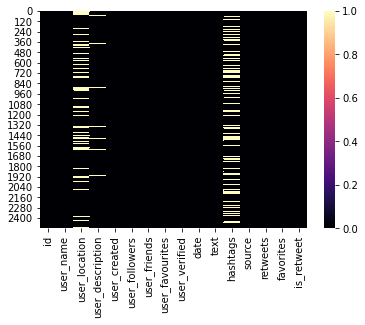

In [10]:
sns.heatmap(data.isnull(), cmap='magma')

In [11]:
null_value_columns = []
for i in data.columns:
  if data[i].isnull().any() == True:
    null_value_columns.append(i)
null_value_columns


['user_location', 'user_description', 'hashtags', 'source']

In [12]:
np.where(data['user_location'].isnull())

(array([   4,    7,    8,   11,   13,   14,   20,   24,   36,   42,   46,
          47,   50,   61,   66,   70,   74,   97,   98,  106,  107,  108,
         112,  114,  121,  123,  132,  137,  141,  144,  148,  153,  158,
         161,  166,  167,  169,  170,  193,  194,  195,  197,  209,  210,
         213,  219,  224,  228,  230,  236,  237,  241,  247,  268,  272,
         277,  279,  281,  287,  294,  296,  306,  312,  313,  320,  326,
         327,  328,  329,  333,  345,  354,  355,  359,  360,  365,  369,
         373,  375,  378,  379,  380,  381,  385,  386,  389,  392,  395,
         399,  401,  405,  406,  430,  440,  442,  443,  450,  452,  454,
         458,  484,  489,  494,  496,  499,  500,  504,  507,  508,  512,
         514,  547,  557,  564,  566,  567,  580,  581,  590,  591,  595,
         599,  605,  606,  609,  613,  624,  626,  627,  629,  630,  631,
         636,  642,  644,  645,  647,  649,  655,  672,  673,  683,  697,
         702,  703,  711,  719,  724, 

In [13]:
np.where(data['user_description'].isnull())

(array([  20,   46,   59,   78,   97,  121,  141,  144,  148,  153,  161,
         208,  213,  219,  230,  261,  309,  344,  373,  378,  379,  380,
         381,  383,  389,  398,  401,  405,  428,  465,  466,  498,  505,
         567,  591,  617,  636,  683,  694,  697,  751,  753,  790,  791,
         804,  813,  832,  833,  842,  849,  850,  863,  884,  893,  895,
        1039, 1041, 1089, 1127, 1138, 1162, 1167, 1170, 1176, 1177, 1195,
        1231, 1277, 1315, 1344, 1423, 1431, 1483, 1491, 1502, 1533, 1549,
        1609, 1611, 1621, 1623, 1626, 1678, 1693, 1695, 1713, 1716, 1770,
        1771, 1805, 1837, 1847, 1848, 1861, 1892, 1912, 1936, 1959, 1961,
        2036, 2044, 2076, 2080, 2090, 2094, 2095, 2110, 2142, 2165, 2199,
        2212, 2240, 2269, 2270, 2274, 2279, 2311, 2319, 2354, 2368, 2405,
        2415, 2453, 2472]),)

In [14]:
np.where(data['hashtags'].isnull())

(array([   1,    3,    5,   12,   14,   23,   31,   33,   39,   49,   52,
          56,   60,   66,   69,   71,   76,   77,   80,   81,   88,   99,
         105,  112,  113,  115,  123,  124,  126,  133,  134,  135,  139,
         151,  154,  161,  162,  166,  169,  177,  178,  186,  187,  189,
         202,  203,  208,  212,  213,  214,  215,  218,  221,  222,  223,
         231,  235,  236,  237,  243,  244,  249,  257,  262,  263,  264,
         269,  271,  275,  279,  280,  285,  286,  292,  294,  295,  296,
         304,  309,  313,  314,  315,  316,  317,  322,  324,  331,  334,
         337,  338,  339,  344,  347,  349,  350,  361,  370,  373,  375,
         377,  378,  379,  380,  381,  395,  401,  402,  404,  411,  415,
         419,  432,  440,  443,  448,  452,  455,  462,  468,  472,  476,
         486,  489,  496,  498,  504,  506,  508,  511,  514,  522,  525,
         526,  530,  531,  532,  533,  538,  540,  541,  542,  543,  544,
         547,  552,  555,  556,  557, 

In [15]:
np.where(data['source'].isnull())

(array([1839]),)

In [16]:
data['source'][1839]

nan

In [17]:
null_value_columns

['user_location', 'user_description', 'hashtags', 'source']

In [18]:
data['user_location'] = data["user_location"].fillna("Location Unavialable")
data['user_description'] = data["user_description"].fillna("User Description Unavialable")
data['hashtags'] = data["hashtags"].fillna("Hashtag Unavialable")
data['source'] = data["source"].fillna("Source Unavialable")

In [19]:
data.isnull().sum()

id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
is_retweet          0
dtype: int64

In [20]:
data.head(3)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,Hashtag Unavialable,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False


In [21]:
for i in columns:
  print("number of unique values in",i,"is = ",len(np.unique(data[i])))

number of unique values in id is =  2518
number of unique values in user_name is =  1704
number of unique values in user_location is =  876
number of unique values in user_description is =  1614
number of unique values in user_created is =  1703
number of unique values in user_followers is =  1307
number of unique values in user_friends is =  1157
number of unique values in user_favourites is =  1616
number of unique values in user_verified is =  2
number of unique values in date is =  2516
number of unique values in text is =  2518
number of unique values in hashtags is =  1192
number of unique values in source is =  27
number of unique values in retweets is =  42
number of unique values in favorites is =  115
number of unique values in is_retweet is =  1


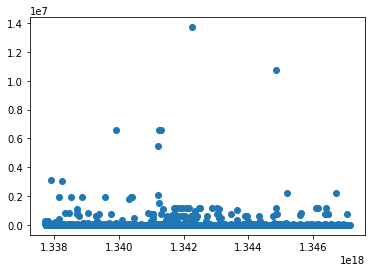

In [22]:
plt.scatter(data['id'],data['user_followers'])

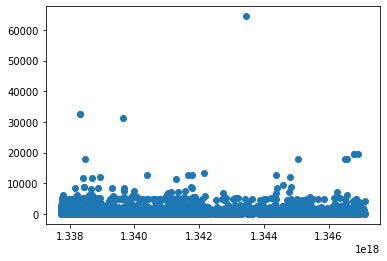

In [23]:
plt.scatter(data['id'],data['user_friends'])

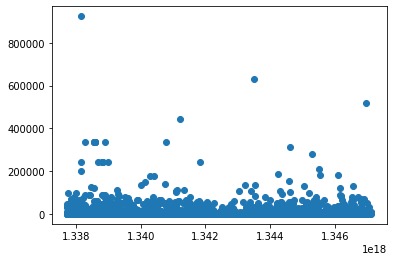

In [24]:
plt.scatter(data['id'],data['user_favourites'])

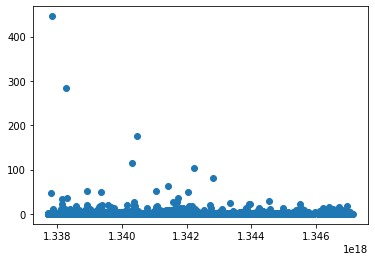

In [25]:
plt.scatter(data['id'],data['retweets'])

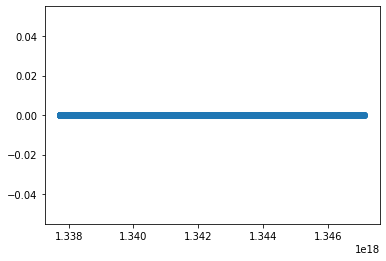

In [26]:
plt.scatter(data['id'],data['is_retweet'])

## Feature engineering

In [27]:
from sklearn.preprocessing import LabelEncoder
data['user_name'] = LabelEncoder().fit_transform(data['user_name'])
data['user_location'] = LabelEncoder().fit_transform(data["user_location"])
data['user_description'] = LabelEncoder().fit_transform(data["user_description"])
data['hashtags'] = LabelEncoder().fit_transform(data["hashtags"])
data['source'] = LabelEncoder().fit_transform(data["source"])

In [28]:
data.drop('date',axis =1,inplace=True)
data.drop('user_created',axis = 1,inplace=True)

In [29]:
data.head(2)

,id,user_name,user_location,user_description,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,1139,386,140,405,1692,3247,False,Same folks said daikon paste could treat a cyt...,754,23,0,0,False
1,1338158543359250433,63,647,867,834,666,178,False,While the world has been on the wrong side of ...,0,22,1,1,False


In [30]:
data['user_verified'].replace(False,0,inplace=True)
data['user_verified'].replace(True,1,inplace=True)
data['user_verified'] =data['user_verified'].astype(int)

In [ ]:
data.drop('is_retweet',axis = 1,inplace=True)

In [33]:
data.drop('id',axis = 1,inplace=True)

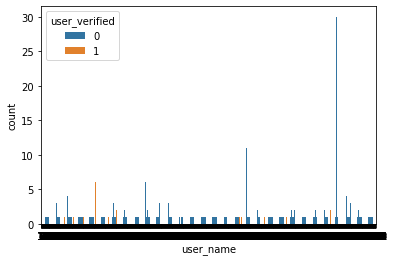

In [34]:
sns.countplot(x='user_name',hue='user_verified',data=data)

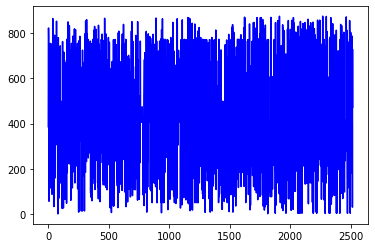

In [35]:
plt.plot(data["user_location"],color='b')

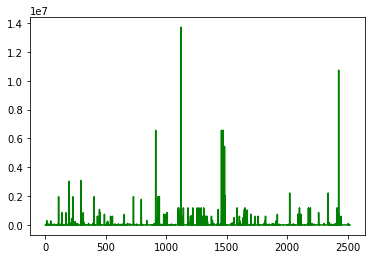

In [36]:
plt.plot(data['user_followers'],color='g')

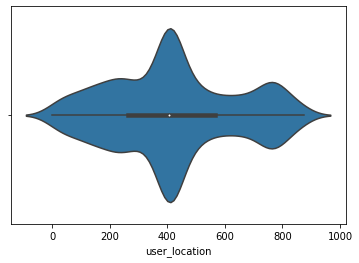

In [37]:
sns.violinplot(x='user_location',hue='user_verified',data=data)

In [38]:
take = []
drop = []
for j in data.columns:
  if j == 'text' or j == 'user_verified':
    take.append(j)
  else:
    drop.append(j)

In [39]:
drop

['user_name',
 'user_location',
 'user_description',
 'user_followers',
 'user_friends',
 'user_favourites',
 'hashtags',
 'source',
 'retweets',
 'favorites']

In [40]:
data.drop(drop,axis=1,inplace=True)

data.head()


,user_verified,text
0,0,Same folks said daikon paste could treat a cyt...
1,0,While the world has been on the wrong side of ...
2,0,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,1,"Facts are immutable, Senator, even when you're..."
4,0,Explain to me again why we need a vaccine @Bor...


In [41]:
x = data['text']
y = data['user_verified']


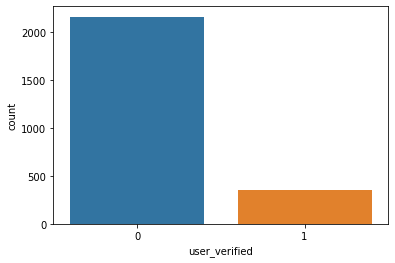

In [42]:
sns.countplot(x = 'user_verified',data=data)

In [43]:
verified_user = []
not_verified_user = []
for i in data['user_verified']:
  if i == 1:
    verified_user.append(i)
  else:
    not_verified_user.append(i)

In [44]:
print("percentage of verified user = ",((len(verified_user)/len(data['user_verified']))*100))

print("percentage of not verified user = ",((len(not_verified_user)/len(data['user_verified']))*100))


percentage of verified user =  14.138204924543288
percentage of not verified user =  85.86179507545671


## Text processing|

In [45]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(10000,lower=True)
tokenizer.fit_on_texts(x)

sequence = tokenizer.texts_to_sequences(x)
final_input = pad_sequences(sequence,maxlen=200,padding='pre')

final_output = np.array(y)

## Model building

In [46]:
from keras.models import Sequential
from keras.layers import Bidirectional,LSTM,Dense,Embedding

model = Sequential()
model.add(
    Embedding(
        input_dim=10000,
        output_dim=120,
        input_length=200,
    ),)
model.add(
    Bidirectional(LSTM(64, return_sequences=True))
)
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1))

model.summary()

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 120)          1200000   
_________________________________________________________________
bidirectional (Bidirectional (None, 200, 128)          94720     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 1,336,001
Trainable params: 1,336,001
Non-trainable params: 0
_________________________________________________________________


In [47]:
pred = model.fit(final_input,final_output,epochs=5,batch_size=32)

Epoch 1/5
79/79 [==============================] - 59s 409ms/step - loss: 0.6225 - accuracy: 0.8509
Epoch 2/5
79/79 [==============================] - 33s 411ms/step - loss: 0.3319 - accuracy: 0.8511
Epoch 3/5
79/79 [==============================] - 32s 410ms/step - loss: 0.1799 - accuracy: 0.9282
Epoch 4/5
79/79 [==============================] - 32s 409ms/step - loss: 0.0662 - accuracy: 0.9864
Epoch 5/5
79/79 [==============================] - 32s 409ms/step - loss: 0.0257 - accuracy: 0.9968


In [48]:
model.save("vaccine delivery.h5")

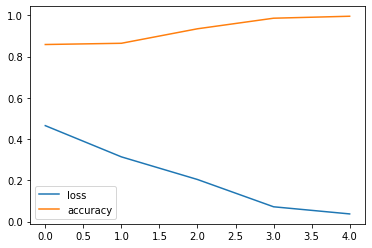

In [49]:
plt.plot(pred.history['loss'],label='loss')
plt.plot(pred.history['accuracy'],label='accuracy')
plt.legend(loc='best')
plt.show()

In [50]:
def verification(details):
  sentence_list = []
  sentence_list.append(details)
  fit = tokenizer.texts_to_sequences(sentence_list)
  sequence = pad_sequences(fit,maxlen=80,padding='pre')
  output = model.predict_classes(sequence)
  if output.all() == 1:
    print("Verified User")
  else:
    print("User is not verified")

verification("While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm")

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


User is not verified
